SYRIATEL CHURN PREDICTION

BUSINESS UNDERSTANDING


1.1 BUSINESS OVERVIEW

SyriaTel, a telecommunications company, is facing customer churn—where subscribers stop using their services and switch to competitors. The main business objective is to reduce churn and thereby protect revenues, since acquiring a new customer is usually more expensive than retaining an existing one.

1.2 BUSINESS PROBLEM

SyriaTel is losing customers to competitors, which reduces revenue. The company currently notices churn only after customers leave, making it costly to replace them. The business problem is to find a way to identify customers who are most likely to leave in advance, so the company can take action to retain them and reduce losses.


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



DATA PREPARATION

In [5]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#load the dataset
SyriaTel = pd.read_csv(r"C:\Users\user\Desktop\PHASE 3 WORK\archive\bigml_59c28831336c6604c800002a.csv")
SyriaTel.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
#Get the info of the dataset
SyriaTel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
SyriaTel.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#Get the number of rows and columns
SyriaTel.shape

(3333, 21)

In [41]:
# Drop unnecessary columns, ignore if not found
SyriaTel = SyriaTel.drop(['international plan', 'voice mail plan'], axis=1, errors='ignore')
# Check new shape
print("Dataset Shape after dropping:", SyriaTel.shape)


Dataset Shape after dropping: (3333, 17)


In [11]:
#check for missing values
SyriaTel.isnull().sum()

state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
#Drop the duplicates
SyriaTel.drop_duplicates

<bound method DataFrame.drop_duplicates of      state  account length international plan voice mail plan  \
0       KS             128                 no             yes   
1       OH             107                 no             yes   
2       NJ             137                 no              no   
3       OH              84                yes              no   
4       OK              75                yes              no   
...    ...             ...                ...             ...   
3328    AZ             192                 no             yes   
3329    WV              68                 no              no   
3330    RI              28                 no              no   
3331    CT             184                yes              no   
3332    TN              74                 no             yes   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              1

In [42]:
# Convert churn to numeric
SyriaTel['churn'] = SyriaTel['churn'].astype(int)


In [43]:
#save the cleaned dataset
SyriaTel.to_csv('SyriaTel_cleaned.csv', index=False)

In [45]:
#check on the new cleaned dataset
SyriaTel_cleaned = pd.read_csv('SyriaTel_cleaned.csv')
SyriaTel_cleaned.head()

,state,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


EXPLANATORY DATA ANALYSIS

Visualisation on how demograpghic influences churn

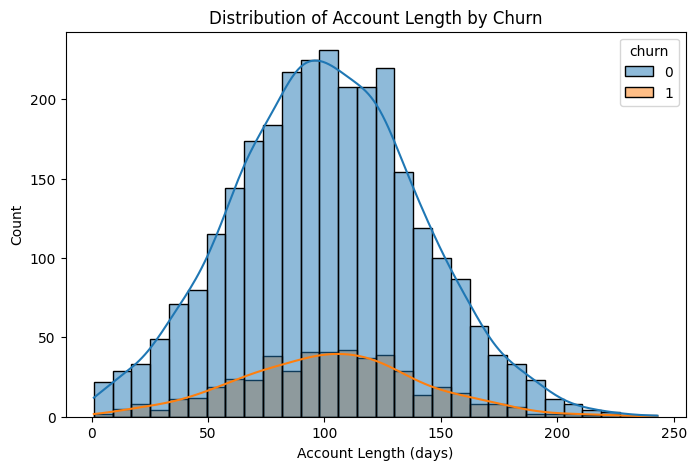

In [49]:
#histogram to show the distribution of account length by churn
plt.figure(figsize=(8,5))
sns.histplot(data = SyriaTel_cleaned, x='account length', hue='churn', kde=True, bins=30)
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.show()

Examine the effect of service usage on churn

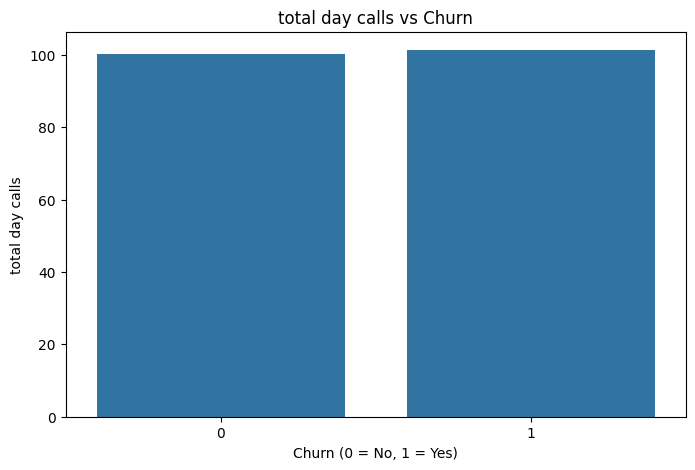

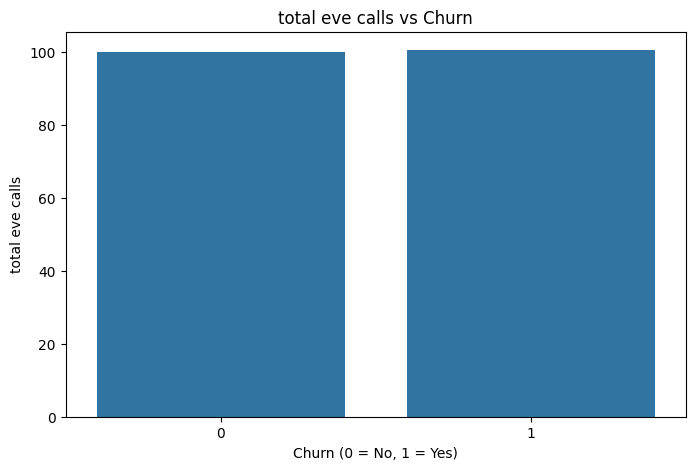

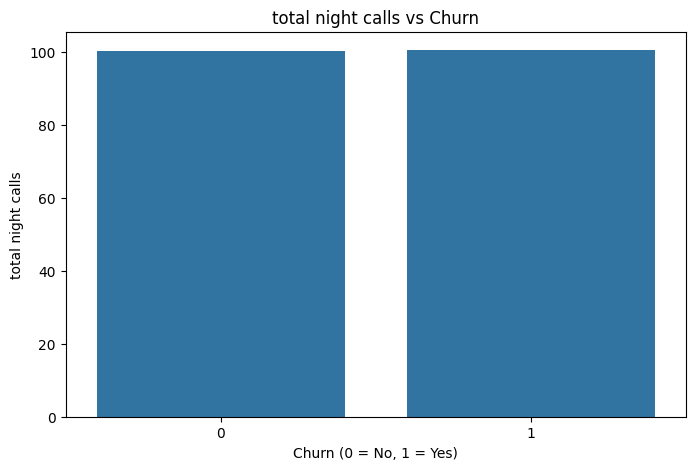

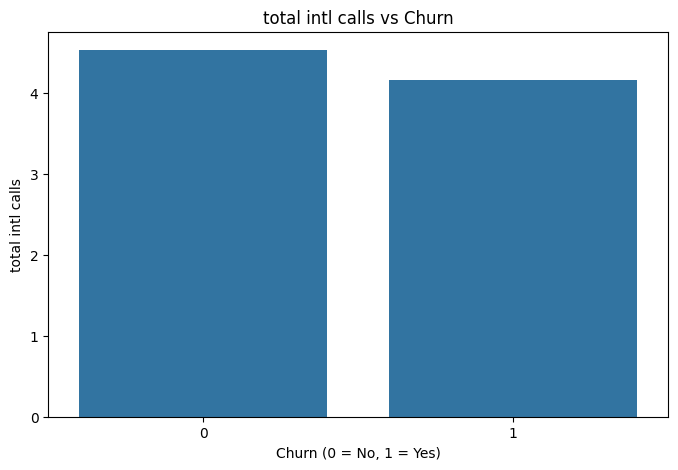

In [51]:
#Barplots for calls vs churn
calls_cols = ['total day calls','total eve calls','total night calls','total intl calls']
for col in calls_cols:
    plt.figure(figsize = (8,5))
    sns.barplot(x='churn', y = col, data = SyriaTel_cleaned, errorbar = None)
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

In [52]:
print("Average customer service calls for churn vs non-churn:")
print(SyriaTel_cleaned.groupby('churn')['customer service calls'].mean())

Average customer service calls for churn vs non-churn:
churn
0    1.449825
1    2.229814
Name: customer service calls, dtype: float64


Histogram showing distribution of customer service calls

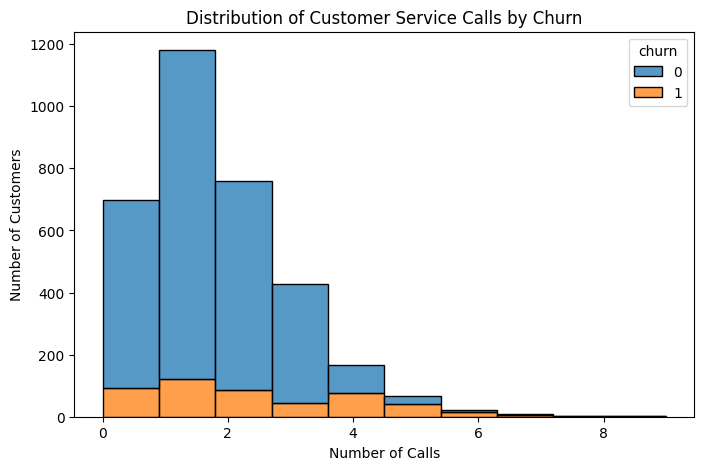

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(data=SyriaTel_cleaned, x='customer service calls', hue='churn', multiple='stack', bins=10)
plt.title("Distribution of Customer Service Calls by Churn")
plt.xlabel("Number of Calls")
plt.ylabel("Number of Customers")
plt.show()

Compare average calls.

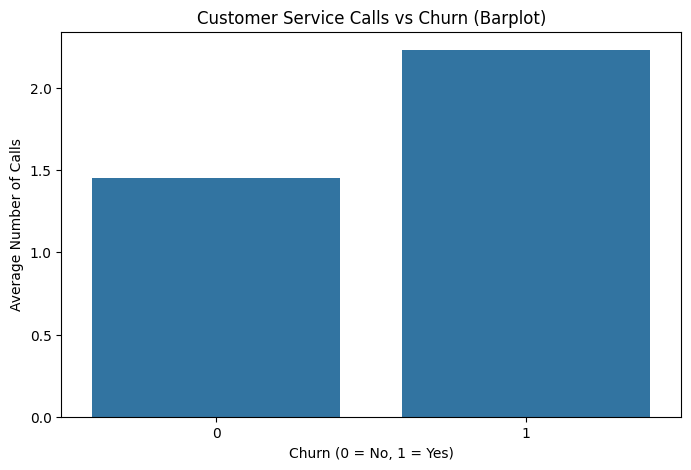

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='churn', y='customer service calls', data=SyriaTel_cleaned, errorbar=None)
plt.title("Customer Service Calls vs Churn (Barplot)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Average Number of Calls")
plt.show()

TOP 10 STATES WITH HIGHEST CHURN RATE

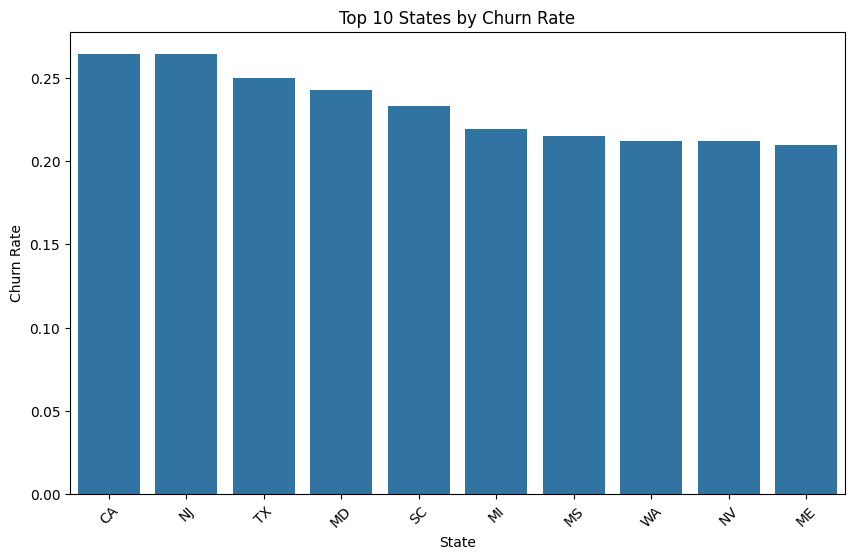

In [56]:
#Top 10 states with highest churn rate ---
top_states = SyriaTel_cleaned.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 10 States by Churn Rate")
plt.ylabel("Churn Rate")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()